## Files are supported in OpenCV library:

 * Windows bitmaps – *.bmp, *.dib
 * JPEG files – *.jpeg, *.jpg
 * Portable Network Graphics – *.png 
 * WebP – *.webp 
 * Sun rasters – *.sr, *.ras 
 * TIFF files – *.tiff, *.tif 
 * Raster and Vector geospatial data supported by GDAL 

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/38.1 MB ? eta -:--:--
                                              0.1/38.1 MB 2.2 MB/s eta 0:00:18
                                              0.3/38.1 MB 3.4 MB/s eta 0:00:12
     -                                        1.0/38.1 MB 6.8 MB/s eta 0:00:06
     --                                       2.6/38.1 MB 13.6 MB/s eta 0:00:03
     ----                                     4.6/38.1 MB 19.6 MB/s eta 0:00:02
     -------                                  6.8/38.1 MB 24.1 MB/s eta 0:00:02
     ----------                               9.9/38.1 MB 30.2 MB/s eta 0:00:01
     -----------                             11.4/38.1 MB 50.1 MB/s eta 0:00:01
     -----------                             11.7/38.1 MB 38.5 MB/s eta 0:00:01
     ------------                            12.1/38.1 MB 36.4 MB/s eta 0:00:01
     ------------                            12.3/38.

## Reading an image in OpenCV

In [24]:
import cv2
img = cv2.imread("Mario.jpeg", cv2.IMREAD_COLOR)
if img is None:
    print("Error: Unable to load the image.")
else:
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("Image shape:", img.shape)

Image shape: (690, 345, 3)


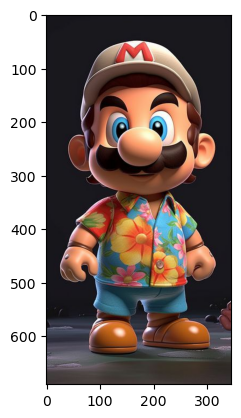

In [19]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("Mario.jpeg", cv2.IMREAD_COLOR)
if img is None:
    print("Error: Unable to load the image.")
else:
    # Convert BGR image to RGB (Matplotlib expects RGB)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

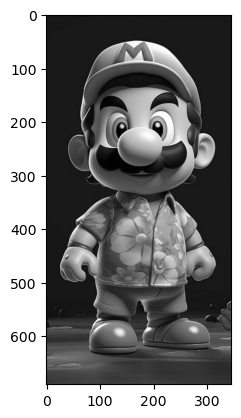

In [17]:
import cv2
import matplotlib.pyplot as plt
path = r'Mario.jpeg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img, cmap='gray')
plt.show()

## Writing an image in OpenCV

In [28]:
import cv2
import os
# Image path
image_path = r'C:\Users\baiva\Downloads\Python-main\OpenCV\Mario.jpeg'
# Image directory
directory = r'C:\Users\baiva\Downloads\Python-main\OpenCV'

img = cv2.imread(image_path)
os.chdir(directory)
print("Before saving image:")
print(os.listdir(directory))
filename = 'savedImage.jpg'
cv2.imwrite(filename, img)
print("After saving image:")
print(os.listdir(directory))
print('Successfully saved')

Before saving image:
['.ipynb_checkpoints', 'Mario.jpeg', 'Untitled.ipynb']
After saving image:
['.ipynb_checkpoints', 'Mario.jpeg', 'savedImage.jpg', 'Untitled.ipynb']
Successfully saved


## Color Spaces in OpenCV

In [33]:
import cv2
image = cv2.imread('Mario.jpeg')
B, G, R = cv2.split(image)
# Corresponding channels are separated

cv2.imshow("original", image)
cv2.waitKey(0)

cv2.imshow("blue", B)
cv2.waitKey(0)

cv2.imshow("Green", G)
cv2.waitKey(0)

cv2.imshow("red", R)
cv2.waitKey(0)

cv2.destroyAllWindows()

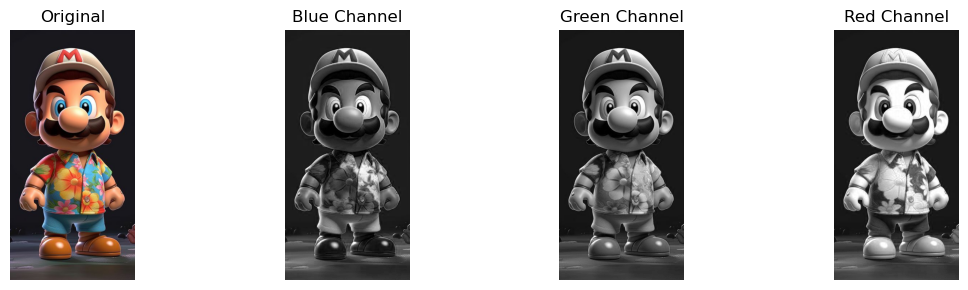

In [46]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('Mario.jpeg')
B, G, R = cv2.split(image)
channels_combined = cv2.merge([B, G, R])
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
ax = axes.ravel()

# Original image
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')

# Blue channel
ax[1].imshow(B, cmap='gray')
ax[1].set_title('Blue Channel')
ax[1].axis('off')

# Green channel
ax[2].imshow(G, cmap='gray')
ax[2].set_title('Green Channel')
ax[2].axis('off')

# Red channel
ax[3].imshow(R, cmap='gray')
ax[3].set_title('Red Channel')
ax[3].axis('off')

plt.tight_layout()
plt.savefig('channels_combined.png')
plt.show()

## Arithmetic Operations on Images using OpenCV

**arithmetic operation of addition of two images**

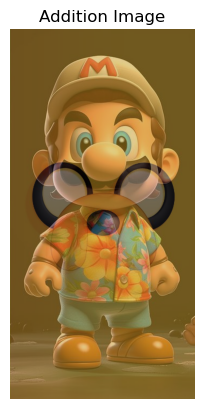

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image1 = cv2.imread('Mario.jpeg')
image2 = cv2.imread('jake.jpeg')

# Resize image2 to match the size of image1
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
if image1.shape[2] == 1:
    image1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2BGR)
weightedSum = cv2.addWeighted(image1, 0.5, image2, 0.4, 0)
cv2.imshow('Weighted Image', weightedSum)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()

# Convert BGR image to RGB for plotting using matplotlib
weightedSum_rgb = cv2.cvtColor(weightedSum, cv2.COLOR_BGR2RGB)

plt.imshow(weightedSum_rgb)
plt.title('Addition Image')
plt.axis('off')
plt.savefig('addition_image.png')
plt.show()

**some time you may get error like this:**
error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'

**The error message indicates that the sizes of the input images do not match when performing the cv2.addWeighted() operation. To fix this, make sure that both image1 and image2 have the same dimensions (width, height, and number of channels).**

*Here are some possible reasons for the error and how to address them:*
1. Image size mismatch
2. Number of channels mismatch

**The cv2.subtract() function in OpenCV is used to perform element-wise subtraction of two images**

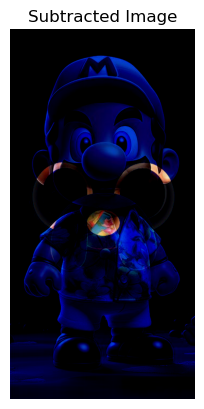

In [47]:
import cv2
import matplotlib.pyplot as plt
image1 = cv2.imread('Mario.jpeg', cv2.IMREAD_COLOR)
image2 = cv2.imread('jake.jpeg', cv2.IMREAD_COLOR)

# Resize image2 to match the size of image1
image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
result = cv2.subtract(image1, image2_resized)
cv2.imshow('Subtracted Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Convert BGR image to RGB for matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.imshow(result_rgb)
plt.title('Subtracted Image')
plt.axis('off')
plt.savefig('subtracted_image.png')
plt.show()

## Bitwise Operations on Binary Images

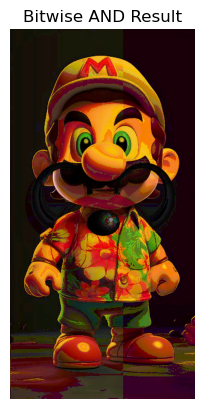

In [50]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('Mario.jpeg')
img2 = cv2.imread('jake.jpeg')
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Perform bitwise AND operation on the input images
dest_and = cv2.bitwise_and(img1, img2, mask=None)
cv2.imshow('Bitwise AND', dest_and)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()
dest_and_rgb = cv2.cvtColor(dest_and, cv2.COLOR_BGR2RGB)
plt.imshow(dest_and_rgb)
plt.title('Bitwise AND Result')
plt.axis('off')
plt.savefig('bitwise_AND.png')
plt.show()

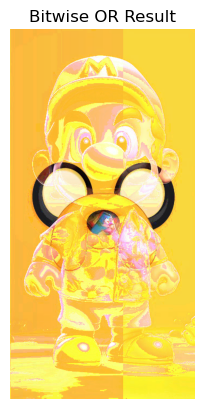

In [57]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('Mario.jpeg')
img2 = cv2.imread('jake.jpeg')
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# cv2.bitwise_or is applied over the image inputs with applied parameters
dest_or = cv2.bitwise_or(img2, img1, mask=None)
cv2.imshow('Bitwise OR', dest_or)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()
dest_or_rgb = cv2.cvtColor(dest_or, cv2.COLOR_BGR2RGB)

plt.imshow(dest_or_rgb)
plt.title('Bitwise OR Result')
plt.axis('off')
plt.savefig('bitwise_OR.png')
plt.show()

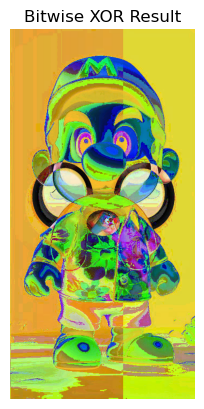

In [58]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('Mario.jpeg')
img2 = cv2.imread('jake.jpeg')
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Perform bitwise XOR operation on the input images
dest_xor = cv2.bitwise_xor(img1, img2_resized, mask=None)
cv2.imshow('Bitwise XOR', dest_xor)

if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()
dest_xor_rgb = cv2.cvtColor(dest_xor, cv2.COLOR_BGR2RGB)

plt.imshow(dest_xor_rgb)
plt.title('Bitwise XOR Result')
plt.axis('off')
plt.savefig('bitwise_XOR.png')
plt.show()

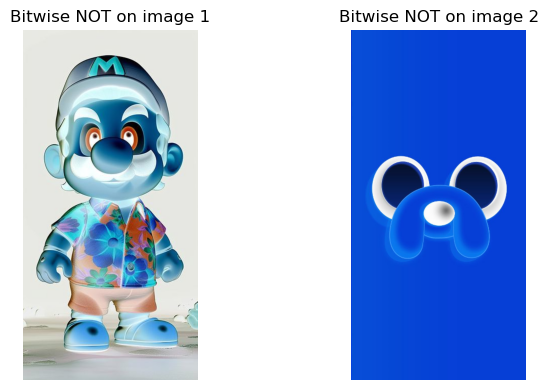

In [60]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('Mario.jpeg')
img2 = cv2.imread('jake.jpeg')

# Reshape the images to have a common shape (e.g., the shape of img1)
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
# Perform bitwise NOT operation on the first input image
dest_not1 = cv2.bitwise_not(img1, mask=None)
dest_not2 = cv2.bitwise_not(img2_resized, mask=None)

# Display the results using OpenCV
cv2.imshow('Bitwise NOT on image 1', dest_not1)
cv2.imshow('Bitwise NOT on image 2', dest_not2)

if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()
dest_not1_rgb = cv2.cvtColor(dest_not1, cv2.COLOR_BGR2RGB)
dest_not2_rgb = cv2.cvtColor(dest_not2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(dest_not1_rgb)
ax[0].set_title('Bitwise NOT on image 1')
ax[0].axis('off')

ax[1].imshow(dest_not2_rgb)
ax[1].set_title('Bitwise NOT on image 2')
ax[1].axis('off')

plt.tight_layout()
plt.savefig('bitwise_NOT.png')
plt.show()
